In [2]:
import matplotlib.font_manager as font_manager
import matplotlib.dates as matdates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from os.path import expanduser
import matplotlib as mpl
import seaborn as sns


sns.set_style("ticks")
fontpath = expanduser('LinLibertine_DRah.ttf')
prop = font_manager.FontProperties(fname=fontpath)

params = {
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': prop.get_name(),
    'text.usetex': False
}
mpl.rcParams.update(params)

In [36]:
not_infected = {"Alt-lite_IDW":{'2017': ((0.2609794775808932, 0.23145888187528568), (0.2603260764881038, 0.23089137717713848), (0.26168210302034994, 0.23201988450769231)),
                               '2018':((0.24424246140853081, 0.20667942779085313), (0.24424246140853081, 0.206308002153807), (0.24424246140853081, 0.20702880513093608))},
                
                "IDW":{'2017':((0.22959631768407676, 0.20318613814071274), (0.22849932479002377, 0.20244194722505812),(0.23066600699955706, 0.20399405509969468)),
                       '2018': ((0.21334660904107566, 0.19339867821215329),(0.21334660904107566, 0.19299672499622314), (0.21334660904107566, 0.19383056455680198))},
                
                "Alt-lite":{'2017':((0.29222916049092845, 0.2671906738978044),(0.2915299657332434, 0.26663177339513133),(0.29284989293637215, 0.2677768597307847)),
                            '2018': ((0.27883307296691784, 0.22419065702883148),(0.27883307296691784, 0.22453525754979256),(0.27883307296691784, 0.22505955615180875))},
                
                "control":{'2017':((0.1887569957504589, 0.17004257998772998), (0.18813186073155475, 0.16964511973851942),(0.1894181016714043, 0.17048126806586236)),
                           '2018':((0.17655315171877026, 0.15337505369938767),(0.17655315171877026, 0.1532140175365099),(0.17655315171877026, 0.1535232890333694))}
               }

In [21]:
from datetime import datetime, timedelta
from os.path import expanduser
import pandas as pd
import numpy as np

categories = ["light", "mild", "severe"]
names = ["Alt-lite_IDW", "IDW", "Alt-lite", "control"]
names_title = ["Alt-lite and I.D.W.", "I.D.W.", "Alt-lite", "Media"]
title = dict(zip(names, names_title))
colors = {"light":"#ff8989", "mild":"#d80000", "severe":"#270000"}
legends = ["light 1-2", "mild 3-5", "severe >5", "not exposed"]
x_labels = [["< 2017", "2017"], ["< 2018", "2018"]]
years = ["2017", "2018"]
lines = ['-', '--', '-.', ':']
df_path = "./../data/sentiment/dataframes/"
img_path = "./../imgs/"

In [4]:
def human_format(num, pos=None):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])

# Perspective

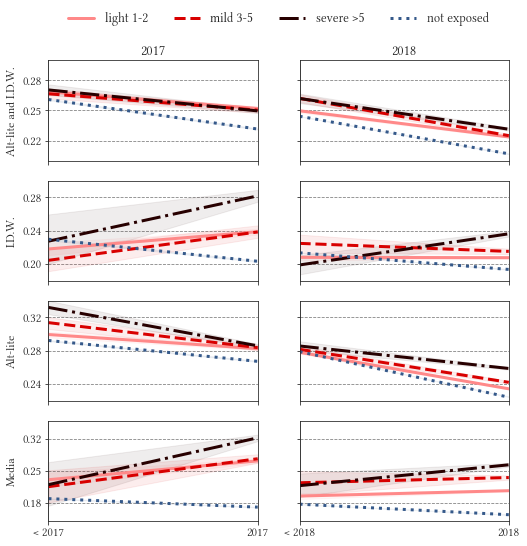

In [37]:
attributes = ['SEVERE_TOXICITY']
attr = attributes[0]
persp_df_path = df_path + "perspective_df/migration/"
perspective = {}

fig = plt.figure(
    constrained_layout=False,
    figsize=(8.25, 8.25),
)
gs = fig.add_gridspec(nrows=4, ncols=2, wspace=0.2, hspace=0.2, top=0.90)

# adds subplot
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1], sharey=ax3)
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1], sharey=ax5)
ax7 = fig.add_subplot(gs[3, 0])
ax8 = fig.add_subplot(gs[3, 1], sharey=ax7)

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
axs_iter = iter(axs)

# Plots cdfs on the top plots
for name in names:
    for year in years: 
        ax = next(axs_iter)
        j = years.index(year)
        for cat in categories:
            i = categories.index(cat)
            perspective = pd.read_csv(f"{persp_df_path}{name}{year}{cat}_perspective_migration_new.csv")
            ax.plot(x_labels[j], perspective[attr][:2], lines[i], linewidth=3, color=colors[cat])
            ax.fill_between(x_labels[j], perspective[f"{attr}_dyd"][:2],
                               perspective[f"{attr}_dyu"][:2], alpha=0.07, color=colors[cat])   
        ax.plot(x_labels[j], not_infected[name][year][0], lines[3], color="#35598a", linewidth=3)
        ax.fill_between(x_labels[j], not_infected[name][year][1],
                        not_infected[name][year][2], alpha=0.07, color="#35598a")   
        # Sets ticks, titles and limits
        if name==names[0]: ax.set_title(f"{year}", fontsize=13.5)
        ax.set_xlim(0, 1)
    
ax1.set_ylim(0.20, 0.30)
ax1.set_yticks([0.22, 0.25, 0.28])

ax3.set_ylim(0.18, 0.30)
ax3.set_yticks([0.20, 0.24, 0.28])

ax5.set_ylim(0.22, 0.34)
ax5.set_yticks([0.24, 0.28, 0.32])

ax7.set_ylim(0.14, 0.36)
ax7.set_yticks([0.18, 0.25, 0.32])


# Adds legend on the top
leg = ax2.legend(legends,
           loc='upper center',
           bbox_to_anchor=(-0.1, 1.6),
           ncol=4,
           fancybox=False,
           shadow=False,
           frameon=False,
           edgecolor=None,
           fontsize=13)


c = 0
for ax in axs:
    c += 1
    if c <7:
        ax.xaxis.set_tick_params(labelbottom=False)
    if c%2 != 1:
        ax.yaxis.set_tick_params(labelbottom=False)
    
for line in leg.get_lines():
    line.set_linewidth(3.0)

# Common axis config, grids, etc
for ax in axs:
    ax.xaxis.grid(color='gray', linestyle='solid')
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adds labels
_ = ax1.set_ylabel("Alt-lite and I.D.W.")
_ = ax3.set_ylabel("I.D.W.")
_ = ax5.set_ylabel("Alt-lite")
_ = ax7.set_ylabel("Media")


# Saves figs
plt.savefig(f"{img_path}perspective/migration/perspective_infection.pdf", bbox_inches = 'tight')
plt.savefig(f"{img_path}perspective/migration/perspective_infection.png", bbox_inches = 'tight')

